#                                       Edoardo Antonaci 1234431

## Exercise 1 - Six Boxes Toy Model : inference

In [1]:
bayes<-function(prior,likelihood){
    posterior<-c()
    
    norm<-likelihood%*%prior
    for (i in 1:6){
        posterior<-c(posterior,likelihood[i]*prior[i]/norm)
    }
    
    return(posterior)
}

In [2]:
#5 boxes definition
N <-5; i <- 0:N; pii <- i/N;

cat("How many draws would you like to do? \n")
n<-as.integer(readline() )

cat("Start to draw out... \n")

balls_draw<-c()

while(length(balls_draw)<n){
    a<-readline()
    balls_draw<-c(balls_draw,as.integer(a))
}

cat("Finish!")

How many draws would you like to do? 
30
Start to draw out... 
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
0
Finish!

In [3]:
extraction_step<-0
P0<-1/6

H<-data.frame("H0"= c(P0),
              "H1"= c(P0),
              "H2"= c(P0),
              "H3"= c(P0),
              "H4"= c(P0),
              "H5"= c(P0), stringsAsFactors = FALSE)


while(extraction_step < n){
    
    extraction_step<-extraction_step+1
    
    B<-balls_draw[extraction_step]              
    
    if (B==1){likelihood<-pii}else{ likelihood<-1-pii}
    
    prior<-as.numeric( H[extraction_step,] )
    
    posterior<-bayes(prior,likelihood)
    
    H[extraction_step+1,]<-posterior

    
    
}

H[1:n,]

H0,H1,H2,H3,H4,H5
0.1666667,1.666667e-01,1.666667e-01,0.16666667,0.1666667,0.1666667
0.0000000,6.666667e-02,1.333333e-01,0.20000000,0.2666667,0.3333333
0.0000000,2.000000e-01,3.000000e-01,0.30000000,0.2000000,0.0000000
0.0000000,8.000000e-02,2.400000e-01,0.36000000,0.3200000,0.0000000
0.0000000,1.538462e-01,3.461538e-01,0.34615385,0.1538462,0.0000000
0.0000000,6.153846e-02,2.769231e-01,0.41538462,0.2461538,0.0000000
0.0000000,2.162162e-02,1.945946e-01,0.43783784,0.3459459,0.0000000
0.0000000,6.956522e-03,1.252174e-01,0.42260870,0.4452174,0.0000000
0.0000000,2.104156e-03,7.574961e-02,0.38348238,0.5386639,0.0000000
0.0000000,6.083650e-04,4.380228e-02,0.33262357,0.6229658,0.0000000


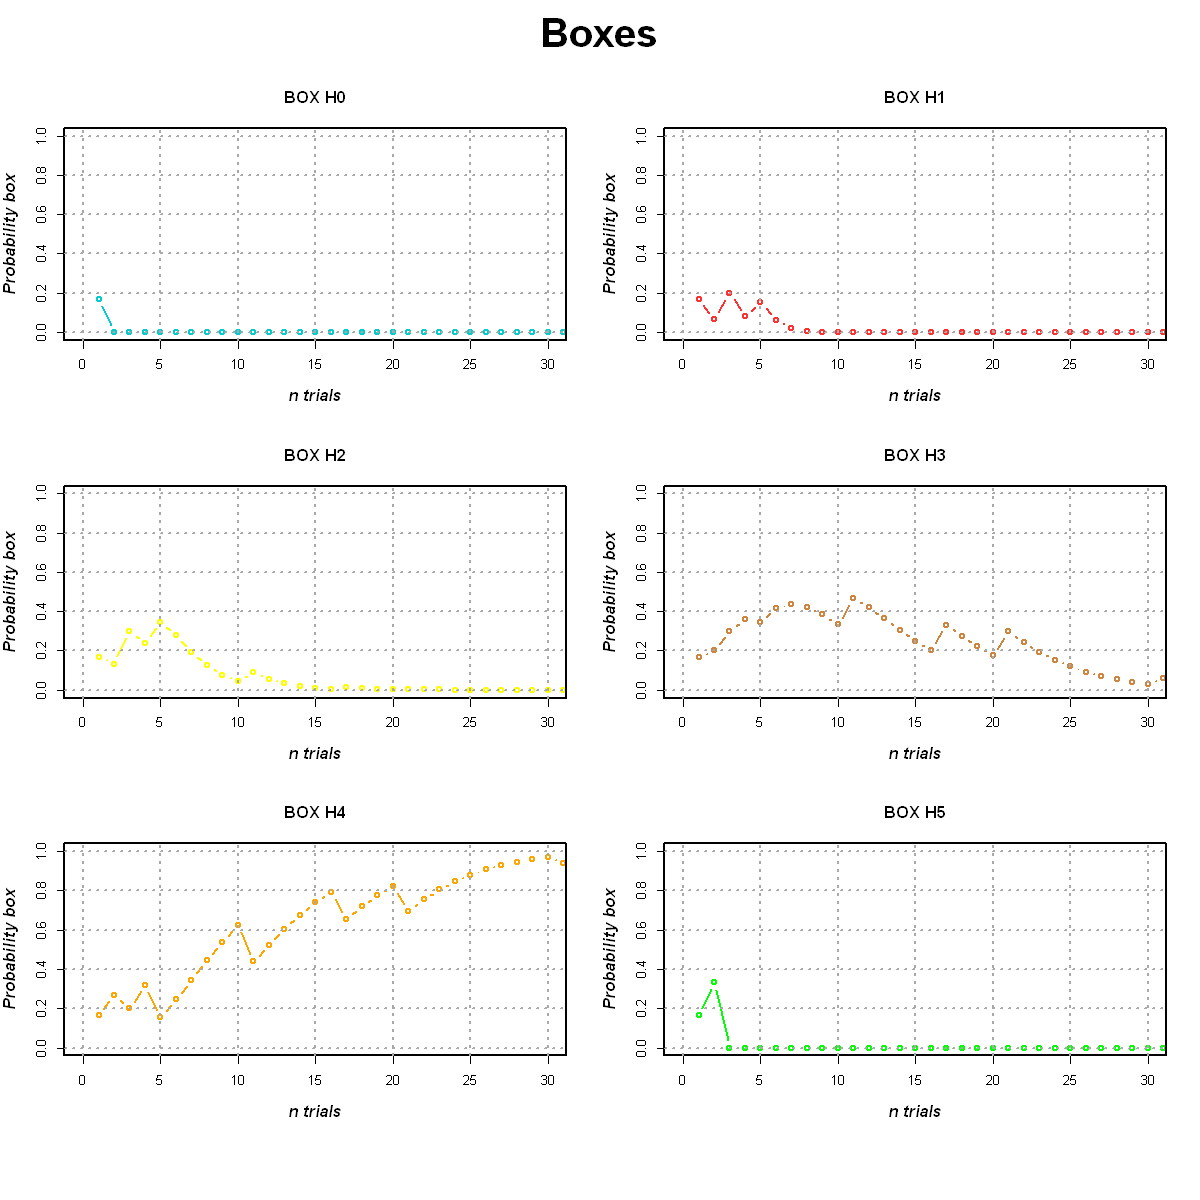

In [4]:
par(mfrow=c(3,2),font.lab=4,cex.main=1.3,cex.lab=1.3,lwd=2,options(repr.plot.width=10, repr.plot.height=10),oma=c(4,0,4,0) )

col=c("cyan3","firebrick1","yellow","tan3","orange","green")

for(i in 1:6) {

    plot(H[,i],col=col[i],type="b",main=paste0("BOX H",i-1),ylab="Probability box",xlab="n trials",ylim=c(0,1),xlim=c(0,n))
    grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")
}
title(paste0("Boxes"),outer=TRUE,cex.main=3 )

# Exercise 2 - Six Boxes Toy Model : simulation

In [5]:
#5 boxes definition
N <-5; i <- 0:N; pii <- i/N; n <- 1000;

#choose randomly a box
s<-sample(i,1)
box_choosen<-rbinom(n,1,pii[s+1])


#before starting picking

extraction_step<-0
P0<-1/6


H<-data.frame("H0"= c(P0),
              "H1"= c(P0),
              "H2"= c(P0),
              "H3"= c(P0),
              "H4"= c(P0),
              "H5"= c(P0), stringsAsFactors = FALSE)


while(extraction_step < n){
    
    extraction_step<-extraction_step+1
    
    B<-box_choosen[extraction_step]              #si procede con la prima estrazione
    
    if (B==1){likelihood<-pii}else{ likelihood<-1-pii}
    
    prior<-as.numeric( H[extraction_step,] )
    
    posterior<-bayes(prior,likelihood)
    
    H[extraction_step+1,]<-posterior

    
    
}

H[1:100,]

H0,H1,H2,H3,H4,H5
0.1666667,0.166666667,1.666667e-01,1.666667e-01,1.666667e-01,0.1666667
0.3333333,0.266666667,2.000000e-01,1.333333e-01,6.666667e-02,0.0000000
0.4545455,0.290909091,1.636364e-01,7.272727e-02,1.818182e-02,0.0000000
0.5555556,0.284444444,1.200000e-01,3.555556e-02,4.444444e-03,0.0000000
0.6384065,0.261491318,8.273749e-02,1.634321e-02,1.021450e-03,0.0000000
0.7062147,0.231412429,5.491525e-02,7.231638e-03,2.259887e-04,0.0000000
0.7616378,0.199658786,3.553497e-02,3.119669e-03,4.874482e-05,0.0000000
0.8068681,0.169212497,2.258714e-02,1.321973e-03,1.032791e-05,0.0000000
0.8437208,0.141552857,1.417127e-02,5.529408e-04,2.159925e-06,0.0000000
0.8736997,0.117265983,8.804880e-03,2.290351e-04,4.473342e-07,0.0000000


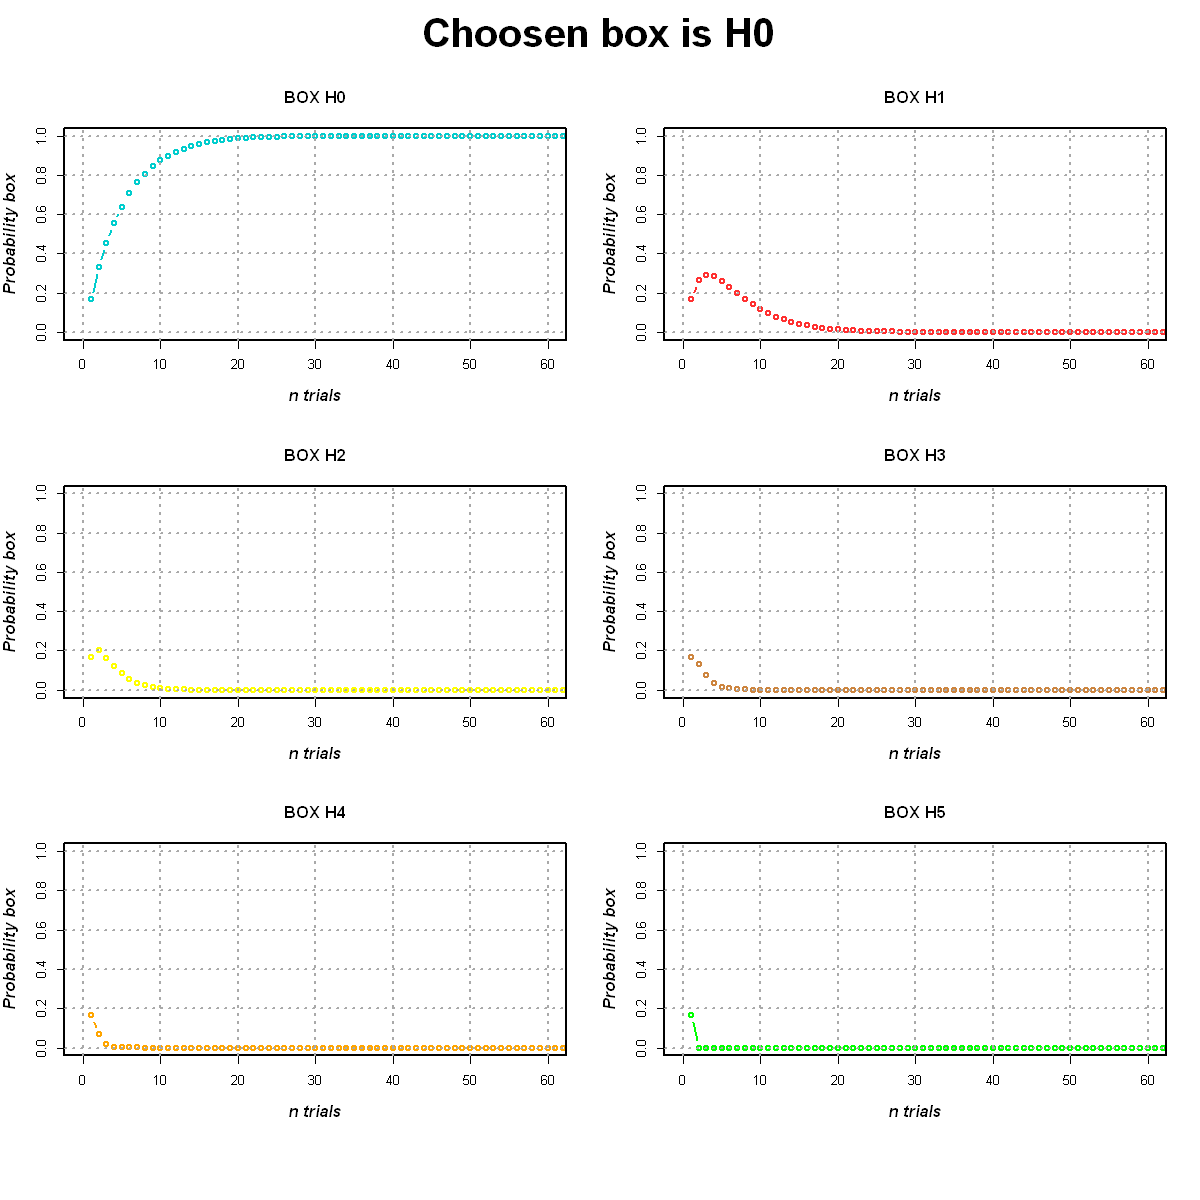

In [6]:
par(mfrow=c(3,2),font.lab=4,cex.main=1.3,cex.lab=1.3,lwd=2,options(repr.plot.width=10, repr.plot.height=10),oma=c(4,0,4,0) )

col=c("cyan3","firebrick1","yellow","tan3","orange","green")

for(i in 1:6) {

    plot(H[,i],col=col[i],type="b",main=paste0("BOX H",i-1),ylab="Probability box",xlab="n trials",ylim=c(0,1),xlim=c(0,60))
    grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")
}
title(paste0("Choosen box is H",s),outer=TRUE,cex.main=3)

## Exercise 3


### a) write an algorithm to sample variables from an Erlang distribution Gamma(m, β)

In [4]:

dearl<-function(x,m,beta){
   
    dearl<-( (beta^m)*x^(m-1)*exp(-beta*x) ) /factorial(m-1)
    
    return(dearl)
}

r_earl<-function(m,beta,n_rand){
    
    r_numbers<-c()
    while(length(r_numbers)<n_rand) 
    {
        x<- -beta*(log(prod(runif(n=m) ) ) )
        
        r_numbers<-c(r_numbers,x)
    
     }
    
    return(r_numbers)
}


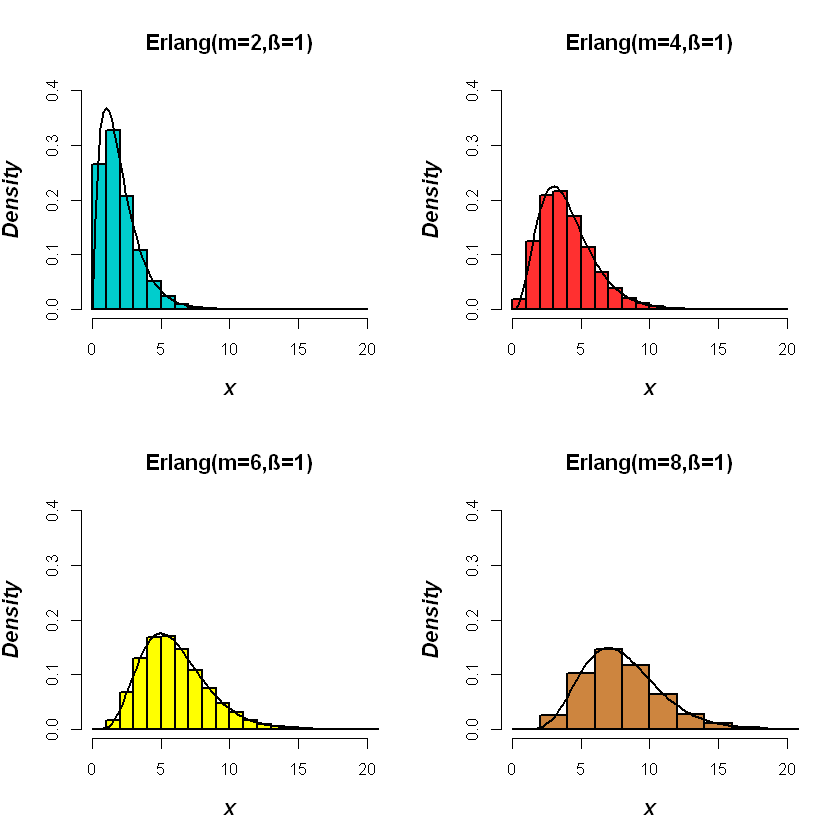

In [5]:
e_rand<-10^5
m<-seq(2,10,2)
beta<-1

par(mfrow=c(2,2),font.lab=4,cex.main=1.3,cex.lab=1.3,lwd=2)

col=c("cyan3","firebrick1","yellow","tan3")

for(i in 1:4) {

    hist(r_earl(m=m[i],beta=beta,n_rand=e_rand),freq=FALSE,col=col[i],
     main= paste0("Erlang(m=",m[i],",β=1)"),xlab="x",ylim=c(0,0.40),xlim=c(0,20))
    
    lines(seq(0,20,length=100),dearl(x=seq(0,20,length=100),m=m[i],beta=beta),lwd=2)
}

## Exercise 4

### • write R code to implement $middle$ $square$ algorithm and, given a fixed digit number input,                         square it an remove the leading and trailing digits, in order to return a number with the same                                  number of digits as the original number


In [1]:

middle_square<-function(x,n){
    
    
    ms<-c()
    
    while(length(ms)<n)
    {
        
    x<-x^2
    number<-unlist(strsplit(as.character(x),"") )
    
        if(length(number)<2 )
        {
         x<-as.numeric(paste(number,collapse="") )
         ms<-c(ms,x)
        }
        else
        {
            digit_to_remove<-as.integer(length(number)/2)
            
            
                if( as.logical(length(number)%% 2) )               #if number is odd
                    {
                     number<-c(rep("0",digit_to_remove),number)
                     random_number<-number[ ( (1+digit_to_remove):(length(number)-digit_to_remove) )]
                    }
                else            #if number is even
                    {
            
                     random_number<-number[( (digit_to_remove/2+1):(length(number)-digit_to_remove/2) ) ]
                    
                    }
            

            x<-as.numeric(paste(random_number,collapse="") )

            ms<-c(ms,x)   
        }
        
    
    }
    
    return(ms)
    
}

In [2]:
n_random_generated<-10
middle_square(53421,n=n_random_generated)

[1] 53803 94762 79836 73786 44373 68963 55895 24251 58811 58733